In [18]:
import polars as pl
import matplotlib.pyplot as plt


In [10]:
DATA_CSV_PATH = "../data/raw/seismic_data.csv"

### Loading data

In [11]:
train_df = pl.read_csv(DATA_CSV_PATH)

In [12]:
train_df.head()

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
str,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,str,str,str
"""2000-06-30T23:32:26.660Z""",44.269,146.265,72.9,4.9,"""mb""",10.0,null,null,0.84,"""us""","""usp0009vgq""","""2014-11-07T01:10:26.358Z""","""39 km NE of Otrada, Russia""","""earthquake""",null,7.8,null,1.0,"""reviewed""","""us""","""us"""
"""2000-06-30T22:36:47.300Z""",-39.23,177.47,36.0,3.4,"""ml""",14.0,null,null,null,"""us""","""usp0009vgp""","""2014-11-07T01:10:26.356Z""","""23 km SSE of Wairoa, New Zeala…","""earthquake""",null,null,null,null,"""reviewed""","""wel""","""wel"""
"""2000-06-30T22:33:48.400Z""",50.666,6.124,12.6,2.6,"""ml""",8.0,null,null,null,"""us""","""usp0009vgn""","""2014-11-07T01:10:26.354Z""","""0 km ESE of Raeren, Belgium""","""earthquake""",null,null,null,null,"""reviewed""","""ldg""","""ldg"""
"""2000-06-30T22:19:02.440Z""",46.7495,-122.806333,6.287,2.7,"""md""",25.0,66.0,0.3629,0.19,"""uw""","""uw10525148""","""2016-07-23T00:01:11.860Z""","""7 km SE of Bucoda, Washington""","""explosion""",0.028,0.11,0.03,5.0,"""reviewed""","""uw""","""uw"""
"""2000-06-30T20:33:42.010Z""",37.399,141.503,42.1,5.4,"""mwc""",216.0,null,null,0.9,"""us""","""usp0009vgk""","""2022-04-29T18:43:13.619Z""","""45 km ESE of Namie, Japan""","""earthquake""",null,null,null,null,"""reviewed""","""us""","""hrv"""


# Data analysis

#### Number of datapoints

In [14]:
rows = train_df.shape[0]
columns = train_df.shape[1]

print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 788820 rows and 22 columns.


#### Numerical vs Categorical categories

In [16]:
numerical_columns = [col for col, dtype in train_df.schema.items() if dtype in [pl.Int64, pl.Float64]]
categorical_columns = [col for col, dtype in train_df.schema.items() if dtype == pl.Utf8]

print(f"Numerical Columns [{len(numerical_columns)}/{columns})] :", numerical_columns)
print(f"Categorical Columns [{len(categorical_columns)}/{columns}] :", categorical_columns)

Numerical Columns [12/22)] : ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']
Categorical Columns [10/22] : ['time', 'magType', 'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource', 'magSource']


### Numerical Plots

In [ ]:
import math
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

def create_histograms(df: pl.DataFrame, numerical_cols: list[str], bins: int = 100) -> None:
    if not numerical_cols:
        return

    n = len(numerical_cols)
    ncols = 4
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))
    axes = np.array(axes).reshape(-1)  # always 1D

    for i, col in enumerate(numerical_cols):
        ax = axes[i]

        s = df.get_column(col).to_numpy()
        s = s[~np.isnan(s)] if np.issubdtype(s.dtype, np.floating) else s

        ax.hist(s, bins=bins)
        ax.set_title(f"Histogram of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    # Remove unused axes if odd number of plots
    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()


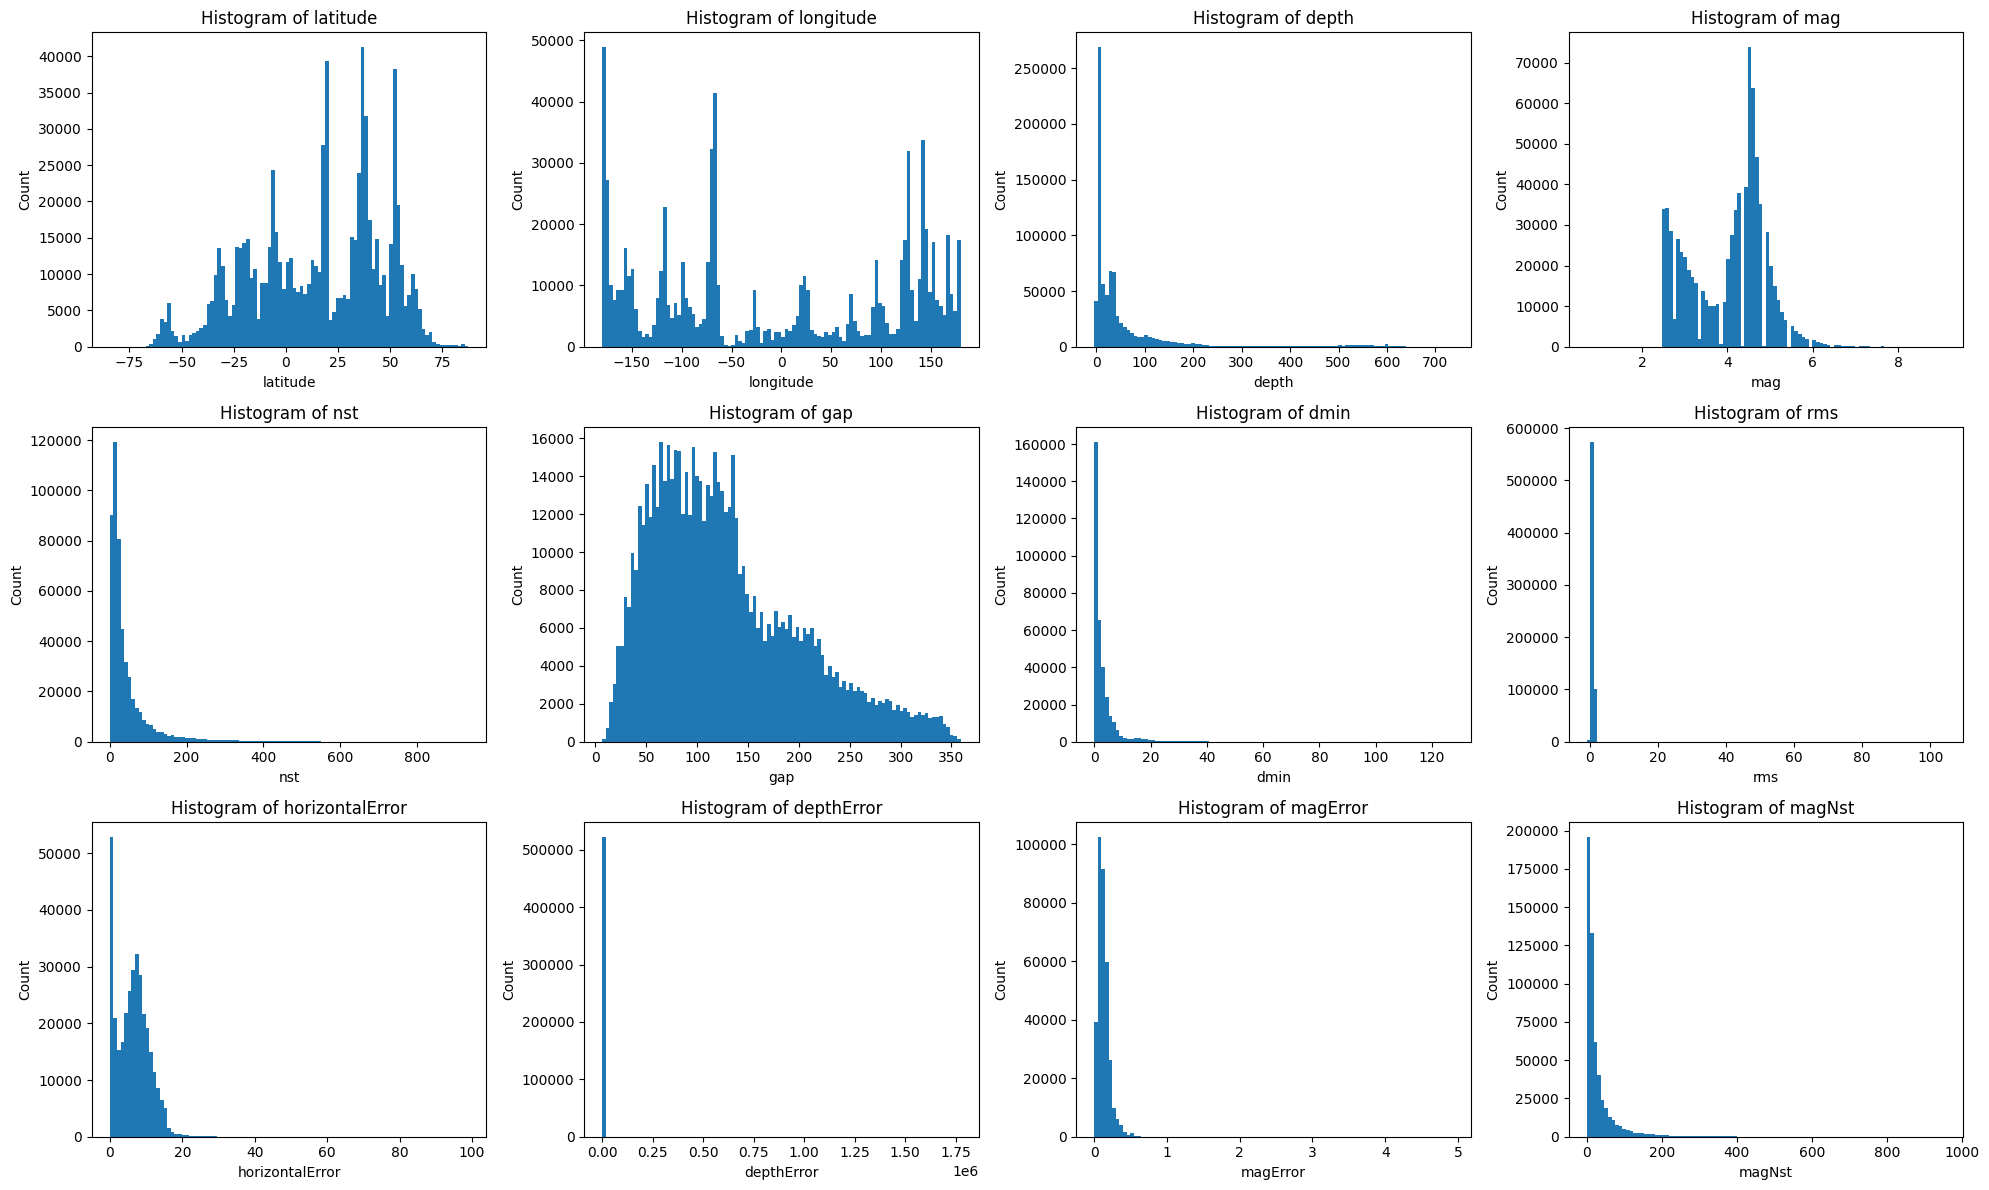

In [42]:
create_histograms(train_df, numerical_columns)